# c1

In [1]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
#%jsroot on

Welcome to JupyROOT 6.14/06


## Import files and names

In [2]:
f1 = ROOT.TFile("/users/PCON0003/cond0068/ARA/AraRoot/analysis/calpul_box/A2_c1_DistroCalPulses_Pol0_CP6_forFit.root")
vpol=f1.Get("Colz_Vpol")
tree = f1.Get("OutputTree")

## <font color='red'>No calpulser 5</font> 

## Calpulser 6

## Let's get the plots first

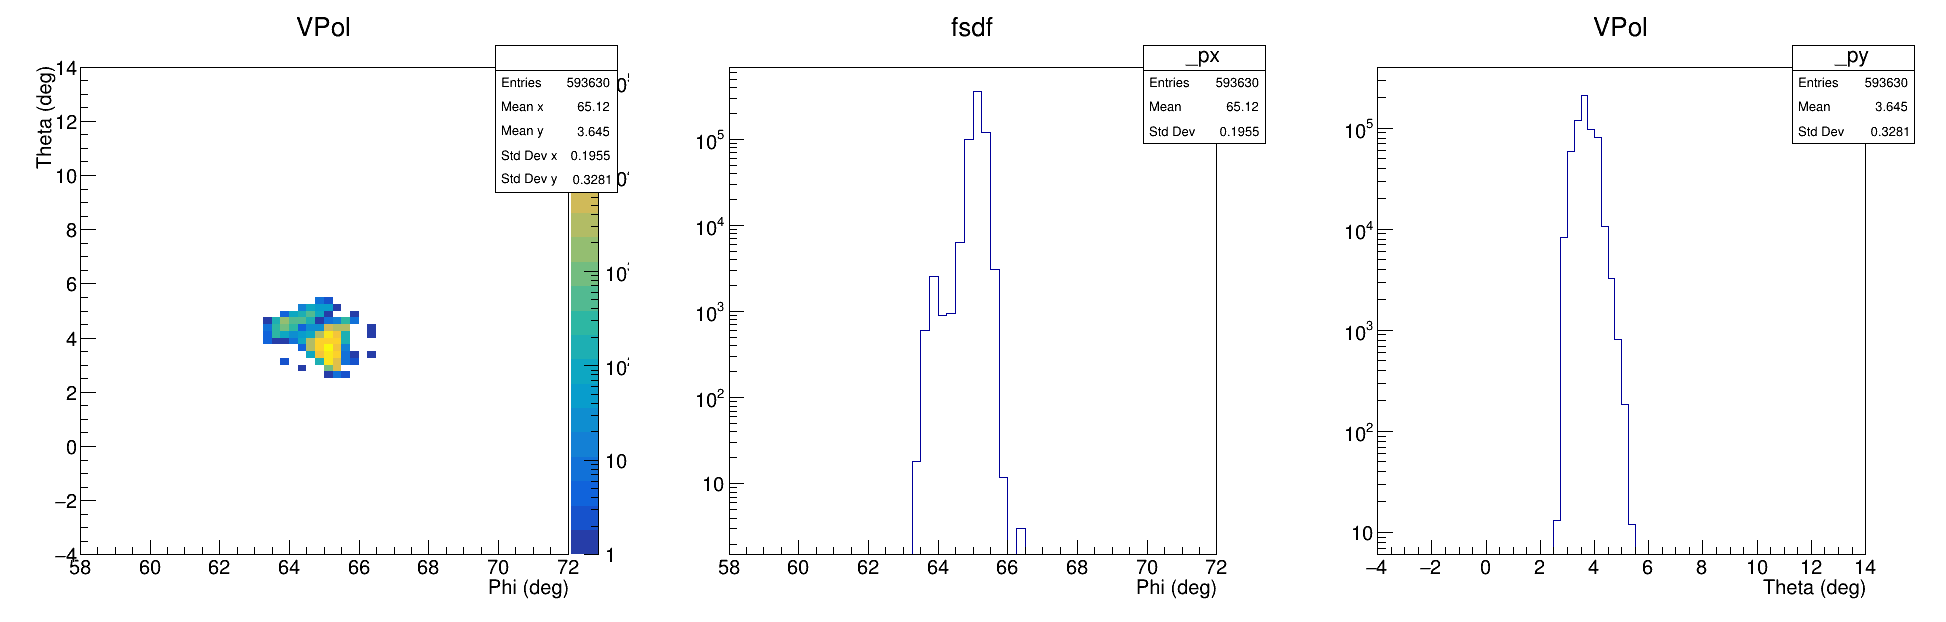

In [3]:
title_phi=str("fsdf")
c=ROOT.TCanvas("","",650*3,650)
c.Divide(3,1)
c.cd(1)
vpol.Draw("COLZ")
gPad.SetLogz()
c.cd(2)
phi_proj_gaus=vpol.ProjectionX()
phi_proj_gaus.Draw()
phi_proj_gaus.SetTitle(title_phi)
gPad.SetLogy()
c.cd(3)
theta_proj_gaus=vpol.ProjectionY()
theta_proj_gaus.Draw()
gPad.SetLogy()
c.Draw()

In [4]:
phi_calpul_v=[]
th_calpul_v=[]
for entry in tree:
    #if(entry.peakPhi_single[0]<0 and entry.peakTheta_single[0]<0 ):
        phi_calpul_v.append(entry.peakPhi_single_out)
        #phi_calpul_h.append(entry.peakPhi_single[1])
        th_calpul_v.append(entry.peakTheta_single_out)
        #th_calpul_h.append(entry.peakTheta_single[1])

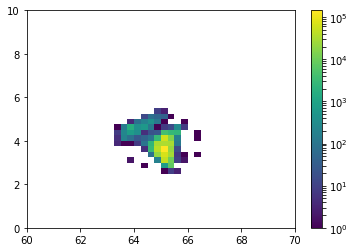

In [5]:
import matplotlib.colors as mcolors
plt.hist2d(phi_calpul_v, th_calpul_v,bins=(40,40),range=[[60, 70], [0, 10]], norm=mcolors.LogNorm());
plt.colorbar()
phi_calpul_v = np.array(phi_calpul_v)
th_calpul_v = np.array(th_calpul_v)

## Use KDE to fit

In [6]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=50j, ybins=50j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[60.:70.:xbins, 
                      0.:10.:ybins]


    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [7]:
xx, yy, zz = kde2D(phi_calpul_v, th_calpul_v, 0.5)

### Integrate to find cut

In [8]:
from scipy.integrate import simps
x_array=xx
x_array.shape

(50, 50)

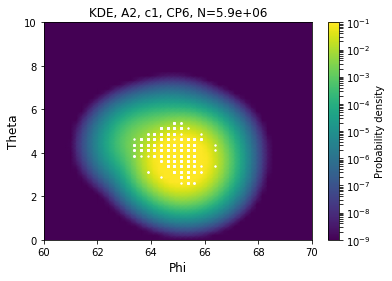

In [9]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.ticker as ticker
N=len(phi_calpul_v)*10#account for 10%
cmap = plt.get_cmap('PiYG')
cmap=plt.pcolormesh(xx, yy, zz,shading='gouraud',norm=colors.LogNorm(vmin=1E-9, vmax=0.1))
#plt.contour(xx, yy, zz)
# CS = plt.contour(xx, yy, zz, 6,
#                  colors='w',  # negative contours will be dashed by default
#                  levels=[1e-3/(N*10)],locator=plt.LogLocator())
# fmt = ticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
# plt.clabel(CS, fontsize=11, inline=1, fmt=fmt)
plt.scatter(phi_calpul_v, th_calpul_v, s=2, facecolor="white" )
plt.colorbar(cmap,label='Probability density')
#plt.ylim(0,10)
#plt.xlim(60,70)
#plt.axis('equal')

plt.xlabel("Phi", size=12)
plt.ylabel("Theta",size=12)
plt.title("KDE, A2, c1, CP6, N=%0.1e" %N )
plt.savefig("/users/PCON0003/cond0068/ARA/KDE_A2_c1_CP6.png", dpi=200)

## <font color='red'>~~~~~~~~~~~~~~~~Deprecated~~~~~~~~~~~~</font> 

## Fit the distros

In [10]:
phi_proj=vpol.ProjectionX()
theta_proj=vpol.ProjectionY()


j1 = ROOT.TF1("n1","gaus",2,5)
j2 = ROOT.TF1("n2","gaus",5,8)
#j3 = ROOT.TF1("n2","gaus",5,8)

#phi.Fit("gaus","S")
total_th = ROOT.TF1("nstotal","gaus(0)+gaus(3)",0,9)
total_th.SetLineColor(4)
theta_proj.Fit(j1,"0R");
theta_proj.Fit(j2,"0RQ+");
#theta_proj.Fit(j3,"0RQ+");
mean_th=np.zeros(6)
for i in range(0,3):
    mean_th[i]=j1.GetParameter(i)
for i in range(3,6):
    mean_th[i]=j2.GetParameter(i-3)
# for i in range(6,9):
#     mean_th[i]=j3.GetParameter(i-6)
total_th.SetParameters(mean_th);
allfit_theta=theta_proj.Fit(total_th,"ESRLQ+")

g1 = ROOT.TF1("m1","gaus",63,64)
g2 = ROOT.TF1("m2","gaus",64,70)
#g3 = ROOT.TF1("m2","gaus",62,65)

#The total is the sum of the three, each has 3 parameters
total = ROOT.TF1("mstotal","gaus(0)+gaus(3)",60,70)
total.SetLineColor(4)
phi_proj.Fit(g1,"0R");
phi_proj.Fit(g2,"0RQ+");
#phi_proj.Fit(g3,"0RQ+");

mean=np.zeros(6)
for i in range(0,3):
    mean[i]=g1.GetParameter(i)
for i in range(3,6):
    mean[i]=g2.GetParameter(i-3)
# for i in range(6,9):
#     mean[i]=g3.GetParameter(i-6)
total.SetParameters(mean);
allfit=phi_proj.Fit(total,"ERLQS+")


 FCN=54080.9 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=1.1161e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.88781e+05   3.00125e+02  -3.71562e-01   1.64492e-07
   2  Mean         3.64016e+00   5.08953e-04   1.40583e-07  -8.81086e-02
   3  Sigma        2.84953e-01   2.33774e-04  -5.17760e-07   3.21450e-01
 FCN=4.5535e-10 FROM MIGRAD    STATUS=CONVERGED     200 CALLS         201 TOTAL
                     EDM=9.42508e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.62381e+03   1.05671e+02   2.28218e-02   5.26928e-08
   2  Mean         6.39220e+01   2.28531e-02   3.04804e-05  -8.70184e-03
   3  Sigma       

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


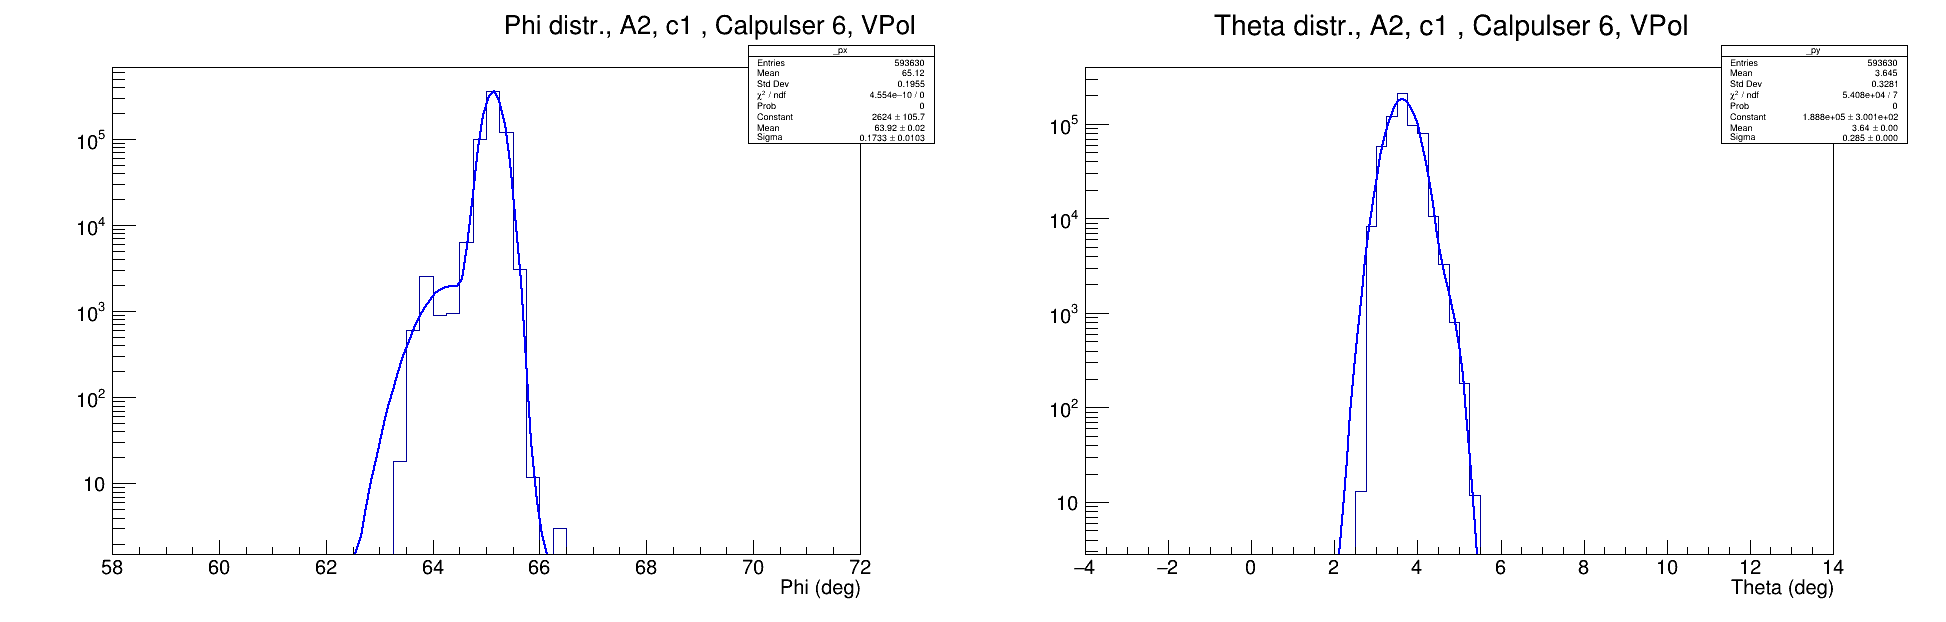

In [11]:
c=ROOT.TCanvas("","",650*3,650)
phi_int=total.Integral(-27,-21)
th_int=total_th.Integral(-30,-18)
name_ph="Phi Projection Near peak, Integral="+ str(phi_int)
name_th="Theta Projection Near peak, Integral="+ str(th_int)
c.Divide(2,1)

c.cd(1)
phi_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
phi_proj_gaus.SetTitle("Phi distr., A2, c1 , Calpulser 6, VPol")
c.cd(2)
theta_proj_gaus.SetTitle("Theta distr., A2, c1 , Calpulser 6, VPol")
theta_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
c.Draw()

In [12]:
from scipy.integrate import simps
x_array=np.array(xx)
x_array.shape
y_array=np.array(yy)

In [13]:
x_reshaped=x_array.reshape(2500)
y_reshaped=y_array.reshape(2500)

In [14]:
x_integ=np.unique(x_reshaped)
y_integ=np.unique(y_reshaped)

In [15]:
simps([simps(zz_x,x_integ[4::4]) for zz_x in zz[4::4,4::4]],y_integ[4::4]) 

0.9999170196540281

In [16]:
y_integ

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [17]:
from scipy.integrate import simps
bins=np.arange(0,50,1)
integral_array=[]
for n in bins:
    integral=simps([simps(zz_x,x_integ[n::]) for zz_x in zz[n::,n::]],y_integ[n::]) 
    integral_array.append(N*integral)
    

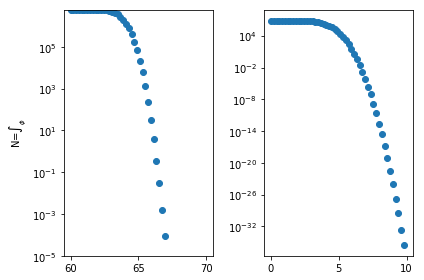

In [18]:
plt.subplot(1, 2, 1)
plt.plot(x_integ, integral_array, "o")
plt.ylabel("N=$\int_{\phi}$")
plt.yscale("log")
plt.ylim(1e-5,N)
plt.subplot(1, 2, 2)
plt.plot(y_integ, integral_array, "o")
plt.yscale("log")
plt.tight_layout()
#plt.ylim(1e-5,1e2)

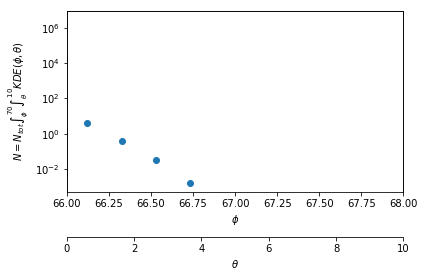

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)

ax1.plot(x_integ, integral_array, "o")
ax1.set_yscale("log")
ax1.set_xlabel(r"$\phi$")
ax1.set_xlim(66,68)
ax1.set_ylim(1e-3/2,1e7)
ax1.set_ylabel("$N=N_{tot}\int_{\phi}^{70}\int_{\\theta}^{10}{KDE(\phi,\\theta)}$")
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
#ax2.set_frame_on(True)
ax2.patch.set_visible(False)

new_tick_locations = np.arange(0,12,2)

ax2.spines["bottom"].set_visible(True)
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel(r"$\theta$")

plt.tight_layout()
#plt.savefig("/users/PCON0003/cond0068/ARA/KDE_A2_c1_CP6_integral_unit.png", dpi=200)

## Final cuts

$$ \vec{X_1}=(63.5,3.3) $$
$$ \vec{X_2}=(66.8,4.0) $$

In [35]:
def getProb(KDE_x,KDE_y, KDE_z, N):
    """"Inputs are the x,y,z arrays from the KDE output, and the number of data
        outputs are 3 arrays, x,y and the probability
    """
    from scipy.integrate import simps
    x_array=np.array(KDE_x)
    x_array.shape
    y_array=np.array(KDE_y)

    x_reshaped=x_array.reshape(2500)
    y_reshaped=y_array.reshape(2500)

    x_integ=np.unique(x_reshaped)
    y_integ=np.unique(y_reshaped)
    bins=np.arange(0,50,1)
    integral_array=[]
    for n in bins:
        integral=simps([simps(zz_x,x_integ[n::]) for zz_x in KDE_z[n::,n::]],y_integ[n::]) 
        integral_array.append(N*integral)
    
    return x_integ, y_integ, integral_array
    

In [36]:
test_x, test_y, test_array = getProb(xx,yy,zz, N)